In [15]:
import numpy as np 
from numpy import load

In [16]:
data = np.load('part1a.npz')
data.files

['N', 'Svc_0_pmf', 'Lc', 'Ic_0', 'gamma']

In [17]:
data['N']


array(100000.)

In [18]:
data['Svc_0_pmf']

array([[0.10953309, 0.03300776, 0.08179044, 0.11593994],
       [0.03089752, 0.08511994, 0.04528764, 0.05718283],
       [0.07471465, 0.02495643, 0.10236599, 0.04256696],
       [0.01605863, 0.08109608, 0.09158212, 0.00789999]])

In [19]:
data['Lc']

array([0.3, 0.4, 0.7, 1. ])

In [20]:
data['Ic_0']

array([47, 90, 51, 65])

In [21]:
data['gamma']

array(0.07142857)

In [22]:
Svc = ((100000-253)*np.array(data['Svc_0_pmf']))
print(Svc)
Ic = (np.array(data['Ic_0']))

[[10925.59735989  3292.42498916  8158.35136699 11564.66095375]
 [ 3081.93503133  8490.45835427  4517.30632554  5703.81528811]
 [ 7452.56208837  2489.3286058  10210.70031003  4245.92611737]
 [ 1601.80065781  8089.09109282  9135.04126738   788.00019138]]


In [23]:
#########################Trying to work with solve_ivp; READ DOCUMENTATION ##################################
# def SIRepidemic(N_,S_,I_,R_,beta_,gamma_):
#     # Total population, N.
# #     N = N_
# #     # Initial number of infected and recovered individuals, I0 and R0.
# #     I0, R0 = I_, R_
# #     # Everyone else, S0, is susceptible to infection initially.
# #     S0 = S_
# #     # Contact rate, beta, and mean recovery rate, gamma, (in 1/days).
# #     beta, gamma = beta_, gamma_
# #     # A grid of time points (in days
#     N = 100000
#     # Initial number of infected and recovered individuals, I0 and R0.
#     I0, R0 = 253, 0
#     # Everyone else, S0, is susceptible to infection initially.
#     S0 = N - I0 - R0
#     # Contact rate, beta, and mean recovery rate, gamma, (in 1/days).
#     beta, gamma = 0.2, 0.07142857

#     t = (0, 120)

#     # The SIR model differential equations.
#     def deriv(t, y, N, beta, gamma):
#         S, I, R = y
#         dSdt = -beta * S * I / N
#         dIdt = beta * S * I / N - gamma * I
#         dRdt = gamma * I
#         print( dSdt, dIdt, dRdt)
#         return dSdt, dIdt, dRdt

#     # Initial conditions vector
#     y0 = (int)(S0), (int)(I0), (int)(R0)
#     # Integrate the SIR equations over the time grid, t.
#     ret = solve_ivp(deriv, t, y0, args=(N, beta, gamma))
#     S = ret.t
#     print(S)
#     I = ret.y 
#     R = ret.sol
# #     S, I, R = ret.t, ret.y, ret.sol

#     # Plot the data on three separate curves for S(t), I(t) and R(t)
#     fig = plt.figure(facecolor='w')
#     ax = fig.add_subplot(111, facecolor='#dddddd', axisbelow=True)
#     ax.plot(t, S/N, 'b', alpha=0.5, lw=2, label='Susceptible')
#     ax.plot(t, I/N, 'r', alpha=0.5, lw=2, label='Infected')
#     ax.plot(t, R/N, 'g', alpha=0.5, lw=2, label='Recovered with immunity')
#     ax.set_xlabel('Time /days')
#     ax.set_ylabel('Number (1000s)')
#     ax.set_ylim(0,1.2)
#     ax.yaxis.set_tick_params(length=0)
#     ax.xaxis.set_tick_params(length=0)
#     ax.grid(b=True, which='major', c='w', lw=2, ls='-')
#     legend = ax.legend()
#     legend.get_frame().set_alpha(0.5)
#     for spine in ('top', 'right', 'bottom', 'left'):
#         ax.spines[spine].set_visible(False)
#     plt.show()
    
    

SyntaxError: invalid syntax (<ipython-input-23-00bde4d8df53>, line 1)

Percentage of Population that never got infected:  0.0054441066%


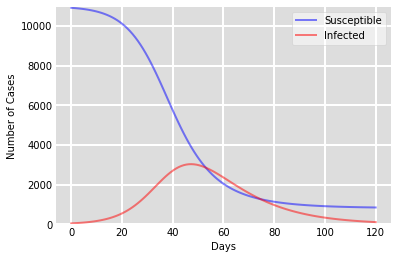

Percentage of Population that never got infected:  0.0125646293%


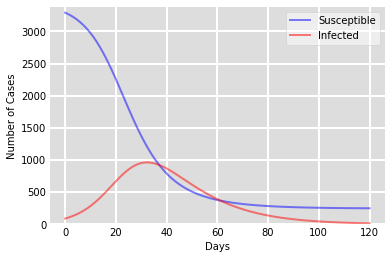

Percentage of Population that never got infected:  0.0042800822%


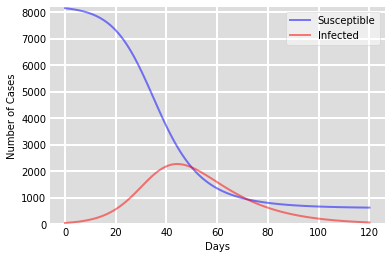

Percentage of Population that never got infected:  0.0056833449%


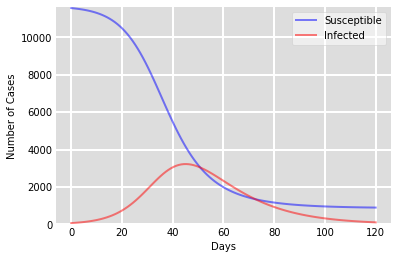

Percentage of Population that never got infected:  0.0298833732%


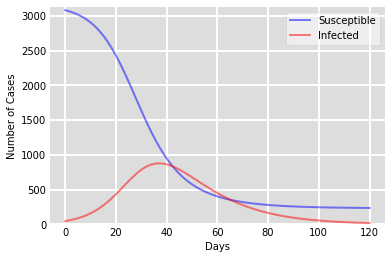

Percentage of Population that never got infected:  0.0053418390%


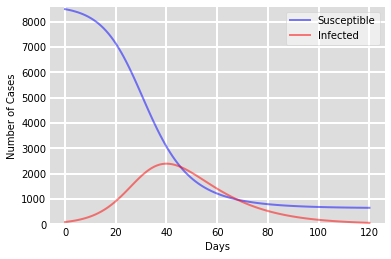

Percentage of Population that never got infected:  0.0067054509%


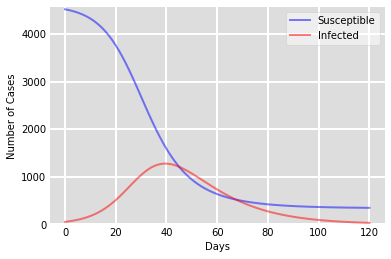

Percentage of Population that never got infected:  0.0141326784%


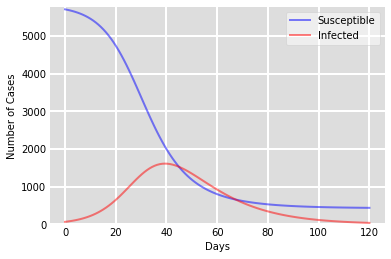

Percentage of Population that never got infected:  0.0074949492%


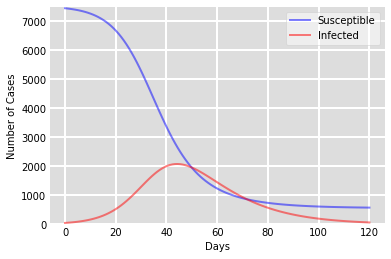

Percentage of Population that never got infected:  0.0127399741%


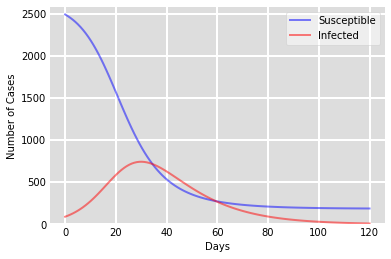

Percentage of Population that never got infected:  0.0068245028%


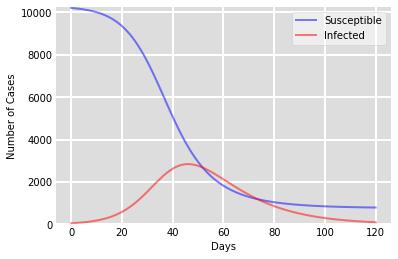

Percentage of Population that never got infected:  0.0214830259%


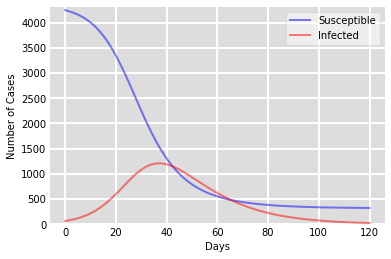

Percentage of Population that never got infected:  0.0485600125%


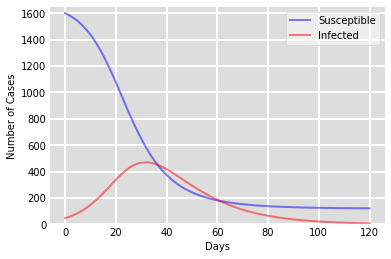

Percentage of Population that never got infected:  0.0011137279%


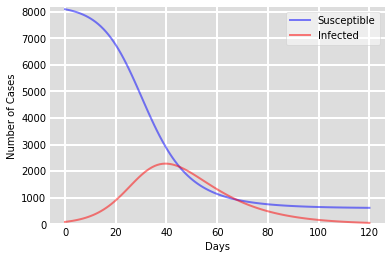

Percentage of Population that never got infected:  0.0004492401%


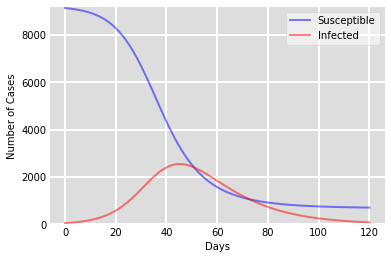

Percentage of Population that never got infected:  0.0000224363%


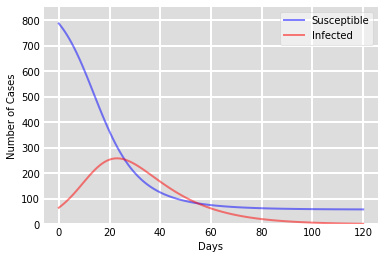

In [79]:
from scipy.integrate import odeint
from scipy.integrate import solve_ivp
import matplotlib.pyplot as plt
count = 0
index = 0
def SIRepidemic(N_,S_,I_,R_,beta_,gamma_):
    # Total population, N.
    N = N_
    # Initial number of infected and recovered individuals, I0 and R0.
    I0, R0 = I_, R_
    # Everyone else, S0, is susceptible to infection initially.
    S0 = S_
    # Contact rate, beta, and mean recovery rate, gamma, (in 1/days).
    beta, gamma = beta_, gamma_
    t = np.linspace(0, 120, 120)

    # The SIR model differential equations.
    def deriv(y, t, N, beta, gamma):
        S, I, R = y
        dSdt = -beta * S * I / N
        dIdt = beta * S * I / N - gamma * I
        dRdt = gamma * I
        return dSdt, dIdt, dRdt

    # Initial conditions vector
    y0 = (int)(S0), (int)(I0), (int)(R0)
    # Integrate the SIR equations over the time grid, t.
    ret = odeint(deriv, y0, t, args=(N, beta, gamma))
    S, I, R = ret.T

    # Plot the data on three separate curves for S(t), I(t) and R(t)
    fig = plt.figure(facecolor='w')
    ax = fig.add_subplot(111, facecolor='#dddddd', axisbelow=True)
    ax.plot(t, S/N, 'b', alpha=0.5, lw=2, label='Susceptible')
    ax.plot(t, I/N, 'r', alpha=0.5, lw=2, label='Infected')
    ax.plot(t, R/N, 'g', alpha=0.5, lw=2, label='Recovered with immunity')
    ax.set_xlabel('Time /days')
    ax.set_ylabel('Number (1000s)')
    ax.set_ylim(0,1.2)
    ax.yaxis.set_tick_params(length=0)
    ax.xaxis.set_tick_params(length=0)
    ax.grid(b=True, which='major', c='w', lw=2, ls='-')
    legend = ax.legend()
    legend.get_frame().set_alpha(0.5)
    for spine in ('top', 'right', 'bottom', 'left'):
        ax.spines[spine].set_visible(False)
    plt.show()
    
for sv in Svc:
    for sc in sv:
#         SIRepidemic(sc +Ic[index] ,sc,Ic[index],0,0.2,0.07142857)
        N = sc +Ic[index]
        I0, R0 = Ic[index], 0
        S0 = sc
        beta, gamma = 0.2, 0.07142857
        t = np.linspace(0, 120, 120)

        def deriv(y, t, N, beta, gamma):
            S, I, R = y
            dSdt = -beta * S * I / N
            dIdt = beta * S * I / N - gamma * I
            dRdt = gamma * I
            return dSdt, dIdt, dRdt

        y0 = (int)(S0), (int)(I0), (int)(R0)
        ret = odeint(deriv, y0, t, args=(N, beta, gamma))
        S, I, R = ret.T
        nvInfected = (N-S-I-R )/N
        nvInfectedPercentage = "{:.10%}".format(nvInfected[0])
        np.set_printoptions(precision=10)
        print("Percentage of Population that never got infected: ",nvInfectedPercentage)

        # Plot the data on three separate curves for S(t), I(t) and R(t)
        fig = plt.figure(facecolor='w')
        ax = fig.add_subplot(111, facecolor='#dddddd', axisbelow=True)
        ax.plot(t, S, 'b', alpha=0.5, lw=2, label='Susceptible')
        ax.plot(t, I, 'r', alpha=0.5, lw=2, label='Infected')
#         ax.plot(t, R/N, 'g', alpha=0.5, lw=2, label='Recovered with immunity')
        ax.set_xlabel('Days')
        ax.set_ylabel('Number of Cases')
        ax.set_ylim(0,N)
        ax.yaxis.set_tick_params(length=0)
        ax.xaxis.set_tick_params(length=0)
        ax.grid(b=True, which='major', c='w', lw=2, ls='-')
        legend = ax.legend()
        legend.get_frame().set_alpha(0.5)
        for spine in ('top', 'right', 'bottom', 'left'):
            ax.spines[spine].set_visible(False)
        plt.show()
        if(index == 3):
            index = 0
        else:
            index += 1
            
            
            
            

In [11]:
from scipy.integrate import odeint
import matplotlib.pyplot as plt

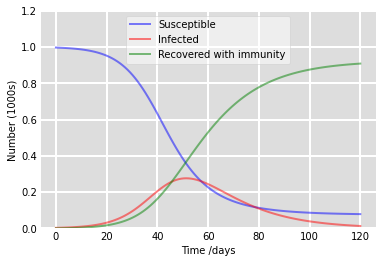

In [82]:
# Total population, N.
N = 100000
# Initial number of infected and recovered individuals, I0 and R0.
I0, R0 = 253, 0
# Everyone else, S0, is susceptible to infection initially.
S0 = N - I0 - R0

# Contact rate, beta, and mean recovery rate, gamma, (in 1/days).
beta, gamma = 0.2, 0.07142857
# A grid of time points (in days)
t = np.linspace(0, 120, 120)

# The SIR model differential equations.
def deriv(y, t, N, beta, gamma):
    S, I, R = y
    dSdt = -beta * S * I / N
    dIdt = beta * S * I / N - gamma * I
    dRdt = gamma * I
    return dSdt, dIdt, dRdt

# Initial conditions vector
y0 = S0, I0, R0
# Integrate the SIR equations over the time grid, t.
ret = odeint(deriv, y0, t, args=(N, beta, gamma))
S, I, R = ret.T

# Plot the data on three separate curves for S(t), I(t) and R(t)
fig = plt.figure(facecolor='w')
ax = fig.add_subplot(111, facecolor='#dddddd', axisbelow=True)
ax.plot(t, S/N, 'b', alpha=0.5, lw=2, label='Susceptible')
ax.plot(t, I/N, 'r', alpha=0.5, lw=2, label='Infected')
ax.plot(t, R/N, 'g', alpha=0.5, lw=2, label='Recovered with immunity')
ax.set_xlabel('Time /days')
ax.set_ylabel('Number (1000s)')
ax.set_ylim(0,1.2)
ax.yaxis.set_tick_params(length=0)
ax.xaxis.set_tick_params(length=0)
ax.grid(b=True, which='major', c='w', lw=2, ls='-')
legend = ax.legend()
legend.get_frame().set_alpha(0.5)
for spine in ('top', 'right', 'bottom', 'left'):
    ax.spines[spine].set_visible(False)
plt.show()